# Unit 4 Project - Model Building 

# Part 1 - Learn Linear Regression Theory

### Step 1: Describe Linear Regression Models 

Answer the following questions after reading the resource material and watching the video lectures linked in the Linear Regression Theory section:

- In your own words, briefly describe a simple linear regression model.
> Linear Regression is a model designed to finde the best fit of a linear line between independend and dependant veriables
- What type of machine learning is linear regression?
> Supervised because the data is "labled"
- What is a “line of best fit” using the OLS method?
> It's the line that creates the smalests squares of the error terms
- What is the difference between correlation and regression?
> correlation is one number, Regression is an equation that expresses the same thing, just more accurately
- Describe a scenario when you would use linear regression and why you would use it.
> Linear Regression is good when you have a lot of data and a semblance of a path. You want to use it to help predict other variables.


### Step 2: Describe Linear Regression Assumptions 

In your own words, describe the following linear regression assumptions after reading the resource material and watching the video lectures linked in the Linear Regression Theory section:

- Linearity
> The Data must have linear relationship for linear regression.
- Normality
> There must be a normal distribution meaning that it must be a normal bell curve.
- Homoscedasticity
> The data must not spread out on either end. Must be a semi constant variance
- No multicollinearity
> The variables MUST not be correlated.
- No endogeneity
> The error must not be correlated with the predictor variable (x)
- No autocorrelation
> There should be no repeating pattern in the data

### Step 3: Describe How to Interpret Results from Correlation Table in Model Summary 

In your own words, describe the following terms after reading the resource material and watching the video lectures linked in the Linear Regression Theory section:

- Coefficient of Constant / Intercept (b0)
> A variable that moves the model "up" or "down"
- Coefficient of Independent Variable (B1)
> The variable of the slope.
- Standard Error
> The average/estimate of the standard deviation. It's the average distance from the data to the model
- T-Statistic
> A number put into the model to test the models accuracy.
- P-Value of T-Statistic (from the independent variable)
> The result of a t-test that shows how close you got.


### Step 4:  Explain R-Squared and adjusted R-squared

In your own words, describe the following terms after reading the resource material and watching the video lectures linked in the Linear Regression Theory section:

- R-squared
> a Num between 0 and 1 that shows how good/close the model is (1 being perfect) problem being that more features means it'll look closer.
- Adjusted R-squared
> This solves the R-squared problem. It only considers significant features. Shows real improvement of the model.

# Part 2 - Linear Regression in Practice

### Step 1: Import libraries and load dataset

In [1]:
# make necessary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

from sklearn.linear_model import LinearRegression
# from sklearn.linear_model import 

In [2]:
# load data

df = pd.read_csv('master.csv')

### Step 2: Explore the data 

#### Spend time exploring the data and looking for relationships between variables. 

In [3]:
# explore data below (you will need to make new cells)

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,house_condition,grade,sqft_above,sqft_basement,year_built,zipcode,lat,long,sqft_living_15,sqft_lot_15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650.0,1.0,0,1,3,7.0,1180.0,0,1955.0,98178.0,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242.0,2.0,0,1,3,7.0,2170.0,400,1951.0,98125.0,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000.0,1.0,0,1,3,6.0,770.0,0,1933.0,98028.0,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000.0,1.0,0,1,5,7.0,1050.0,910,1965.0,98136.0,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080.0,1.0,0,1,3,8.0,1680.0,0,1987.0,98074.0,47.6168,-122.045,1800,7503


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20506 entries, 0 to 20505
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               20506 non-null  int64  
 1   date             20506 non-null  object 
 2   price            20506 non-null  float64
 3   bedrooms         20506 non-null  int64  
 4   bathrooms        20506 non-null  float64
 5   sqft_living      20506 non-null  int64  
 6   sqft_lot         20506 non-null  float64
 7   floors           20506 non-null  float64
 8   waterfront       20506 non-null  int64  
 9   view             20506 non-null  int64  
 10  house_condition  20506 non-null  int64  
 11  grade            20506 non-null  float64
 12  sqft_above       20506 non-null  float64
 13  sqft_basement    20506 non-null  int64  
 14  year_built       20506 non-null  float64
 15  zipcode          20502 non-null  float64
 16  lat              20506 non-null  float64
 17  long        

In [5]:
# sns.pairplot(data=df) # See attached image

<AxesSubplot: xlabel='sqft_living', ylabel='price'>

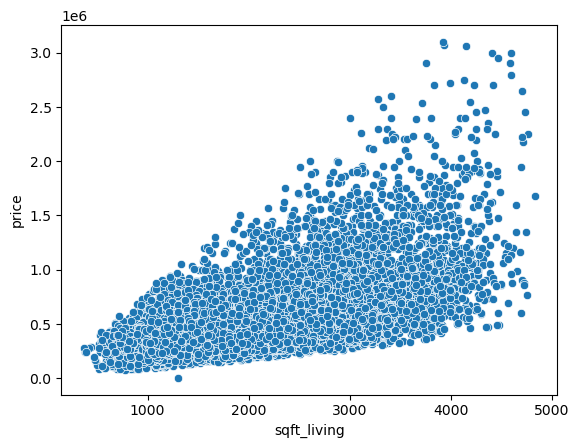

In [6]:
sns.scatterplot(data=df, x=df.sqft_living, y=df.price)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20506 entries, 0 to 20505
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               20506 non-null  int64  
 1   date             20506 non-null  object 
 2   price            20506 non-null  float64
 3   bedrooms         20506 non-null  int64  
 4   bathrooms        20506 non-null  float64
 5   sqft_living      20506 non-null  int64  
 6   sqft_lot         20506 non-null  float64
 7   floors           20506 non-null  float64
 8   waterfront       20506 non-null  int64  
 9   view             20506 non-null  int64  
 10  house_condition  20506 non-null  int64  
 11  grade            20506 non-null  float64
 12  sqft_above       20506 non-null  float64
 13  sqft_basement    20506 non-null  int64  
 14  year_built       20506 non-null  float64
 15  zipcode          20502 non-null  float64
 16  lat              20506 non-null  float64
 17  long        

In [8]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,house_condition,grade,sqft_above,sqft_basement,year_built,zipcode,lat,long,sqft_living_15,sqft_lot_15
count,2.050600e+04,2.050600e+04,20506.000000,20506.000000,20506.000000,20506.000000,20506.000000,20506.000000,20506.000000,20506.000000,20506.000000,20506.000000,20506.000000,20506.000000,20502.000000,20506.000000,20506.000000,20506.000000,20506.000000
mean,4.631187e+09,5.068501e+05,3.328733,2.058849,1984.697552,10518.069242,1.484249,0.005803,1.197991,3.413538,7.571833,1715.223147,269.463620,1970.434751,98079.201102,47.560360,-122.218456,1931.937921,10074.601873
std,2.877465e+09,2.836076e+05,0.854011,0.699346,763.035810,13231.416374,0.539058,0.075959,0.699397,0.650894,1.057773,718.232268,399.934426,29.430323,53.627902,0.138740,0.138451,614.458447,14314.564963
min,1.000102e+06,3.209000e+03,1.000000,0.000000,370.000000,520.000000,1.000000,0.000000,1.000000,1.000000,5.000000,300.000000,0.000000,1900.000000,98001.000000,47.155900,-122.512000,399.000000,651.000000
25%,2.158900e+09,3.165000e+05,3.000000,1.500000,1410.000000,5000.000000,1.000000,0.000000,1.000000,3.000000,7.000000,1180.000000,0.000000,1951.000000,98033.000000,47.470825,-122.331000,1470.000000,5018.000000
50%,3.988850e+09,4.400000e+05,3.000000,2.250000,1870.000000,7470.000000,1.000000,0.000000,1.000000,3.000000,7.000000,1530.000000,0.000000,1973.000000,98072.000000,47.571800,-122.240000,1810.000000,7500.000000
75%,7.370600e+09,6.200000e+05,4.000000,2.500000,2460.000000,10130.250000,2.000000,0.000000,1.000000,4.000000,8.000000,2120.000000,530.000000,1996.000000,98118.000000,47.679175,-122.132000,2300.000000,9750.000000
max,9.900000e+09,3.100000e+06,6.000000,4.250000,4830.000000,139392.000000,3.500000,1.000000,5.000000,5.000000,11.000000,4285.000000,1610.000000,2050.000000,98199.000000,47.777600,-121.315000,4042.000000,310582.000000


<AxesSubplot: xlabel='price'>

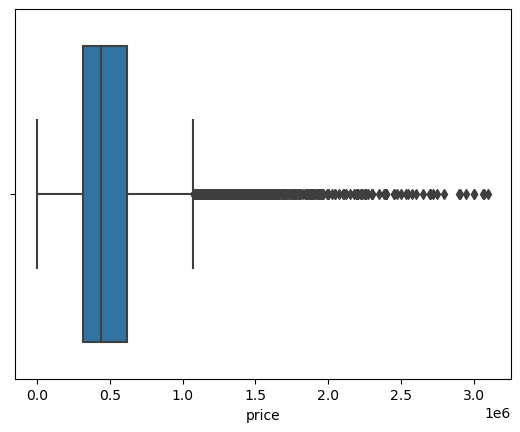

In [9]:
sns.boxplot(data=df, x=df.price)

In [10]:
df.price

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
20501    475000.0
20502    360000.0
20503    400000.0
20504    400000.0
20505    325000.0
Name: price, Length: 20506, dtype: float64

In [11]:
df = df.drop(df[df.price == 3209].index)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
train, test = train_test_split(df, test_size=0.2, random_state=42)

### Step 3: Determine independent and dependent variable

In [14]:
# set X 

x = train.sqft_living
x = x.to_numpy()
x = x.reshape(-1, 1)

X = test.sqft_living
X = X.to_numpy()
X = X.reshape(-1, 1)

# set Y 

y = train.price
y = y.to_numpy()
y = y.reshape(-1, 1)

Y = train.price
Y = Y.to_numpy()
Y = Y.reshape(-1, 1)

<AxesSubplot: xlabel='sqft_living', ylabel='price'>

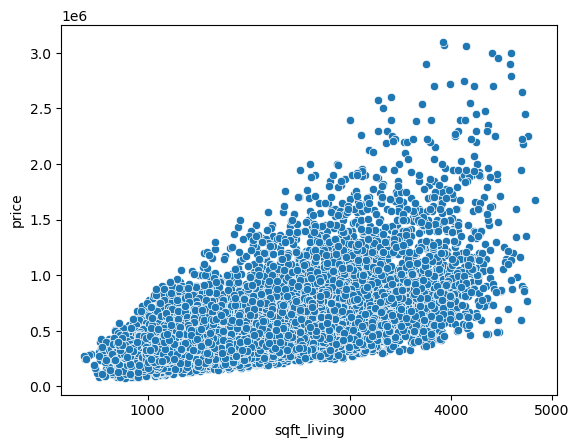

In [15]:
# visualize relationship between X and Y
sns.scatterplot(data=df, x=df.sqft_living, y=df.price)

### Step 4: Fit Regression 

Solution below is for example only. Results may vary depending on variables chosen by student to use in linear regression model and which statistical package is used for linear regression model.

In [16]:
import statsmodels.api as sm
from scipy import stats

X_sci = df.sqft_living

y_sci = df.price

X2_sci = sm.add_constant(X_sci)
est = sm.OLS(y_sci, X2_sci)
est2 = est.fit()
est2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                 1.354e+04
Date:                Wed, 21 Dec 2022   Prob (F-statistic):               0.00
Time:                        07:59:20   Log-Likelihood:            -2.8134e+05
No. Observations:               20505   AIC:                         5.627e+05
Df Residuals:                   20503   BIC:                         5.627e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        4.165e+04   4283.081      9.724      0.000    3.33e+04       5e+04
sqft_living   234.4025      2.014    116.370      0.000     230.454     238.351
==============================================================================
Omnibus:                     9153.740   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            83927.089
Skew:                           1.918   Prob(JB):                         0.00
Kurtosis:                      12.138   Cond. No.                     5.93e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.93e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
# fit model to X and Y variables (you will need to make more cells)

reg = LinearRegression()

In [18]:
reg.fit(x, y)

LinearRegression()

In [19]:
reg.coef_

array([[232.2900735]])

<AxesSubplot: xlabel='sqft_living', ylabel='price'>

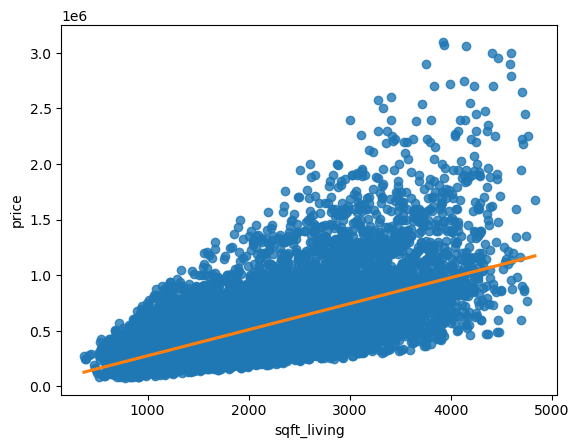

In [20]:
sns.regplot(data=reg, x=df.sqft_living, y=df.price, line_kws={'color': 'C1'})

### Step 5: Interpret Model Summary 

In [21]:
# print out and interpret model summary // terms identified below
reg.coef_

array([[232.2900735]])

In [22]:
reg.score(x,y)

0.39532517597520656

In [23]:
r2 = reg.score(x,y)

n = x.shape[0]
p = x.shape[1]
adjusted_r2 = 1-(1-r2)*((n-1)/(n-p-1))
adjusted_r2

0.39528831005495135

In [24]:
from sklearn.feature_selection import f_regression

In [25]:
f_regression(x,y)

C:\Users\bohnd\.conda\envs\machine-learning\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(array([10723.32314613]), array([0.]))

In [26]:
p_value = f_regression(x,y)[1]
p_value

C:\Users\bohnd\.conda\envs\machine-learning\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0.])

In [27]:
reg.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

reg.predict(x)

Interpret the following from your model:

- R-squared: 0.3977
- Coefficient of independent variable: 0.0016
- P-value of T-statistic: 116.370
- P-value of F-statistic: 0

### Step 6: Predict Values

Solution below is for example only. Results may vary depending on variables chosen by student to use in linear regression model. 

In [28]:
# predict new y values (dependent variables) by feeding model new independent variable values

predict_this = np.array([900, 9000, 8907908])
predict_this = predict_this.reshape(-1, 1)


reg.predict(predict_this)


array([[2.54788399e+05],
       [2.13633799e+06],
       [2.06926433e+09]])

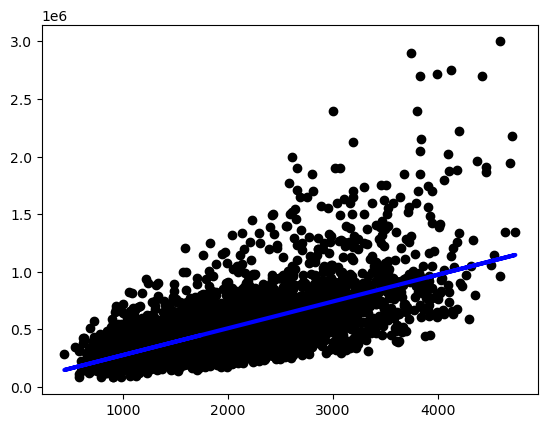

In [29]:
y_predict = reg.predict(X)
plt.scatter(test.sqft_living, test.price, color="black")
plt.plot(test.sqft_living, y_predict, color="blue", linewidth=3)

# Part 3 - Multiple Linear Regression

### Step 1: From Data Exploration in Part 2, Pick Another Independent Variable 

In [30]:
# Pick another independent variable. Be sure to avoid multicollinearity. 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20505 entries, 0 to 20505
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               20505 non-null  int64  
 1   date             20505 non-null  object 
 2   price            20505 non-null  float64
 3   bedrooms         20505 non-null  int64  
 4   bathrooms        20505 non-null  float64
 5   sqft_living      20505 non-null  int64  
 6   sqft_lot         20505 non-null  float64
 7   floors           20505 non-null  float64
 8   waterfront       20505 non-null  int64  
 9   view             20505 non-null  int64  
 10  house_condition  20505 non-null  int64  
 11  grade            20505 non-null  float64
 12  sqft_above       20505 non-null  float64
 13  sqft_basement    20505 non-null  int64  
 14  year_built       20505 non-null  float64
 15  zipcode          20501 non-null  float64
 16  lat              20505 non-null  float64
 17  long        

In [31]:
xm = train[["sqft_living", "sqft_living_15"]]
xm = xm.to_numpy()
# xm = xm.reshape(-1, 1)

XM = test[["sqft_living", "sqft_living_15"]]
XM = XM.to_numpy()
XM = XM.reshape(-1, 1)

# set Y 

y = train['price']
y = y.to_numpy()
y = y.reshape(-1, 1)

Y = train['price']
Y = Y.to_numpy()
Y = Y.reshape(-1, 1)

### Step 2: Fit A New Multiple Linear Regression Model to the New Independent Variables

Solution below is for example only. Results may vary depending on variables chosen by student to use in linear regression model. 

In [32]:
# fit new regression model (you will need to make more cells)
reg.fit(xm, y)

LinearRegression()

<AxesSubplot: xlabel='sqft_living_15', ylabel='price'>

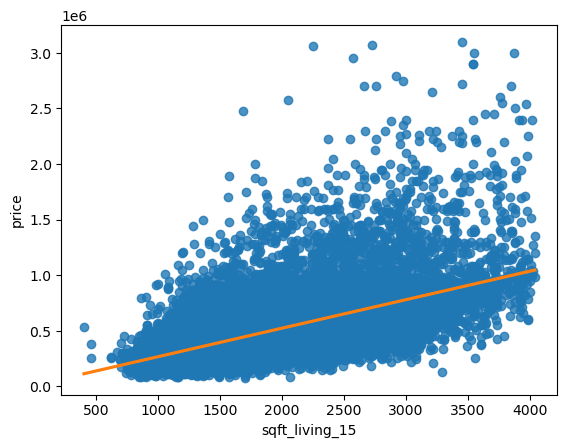

In [33]:
sns.regplot(data=reg, x=df.sqft_living_15, y=df.price, line_kws={'color': 'C1'})

In [34]:
reg.score(xm,y)

0.4122686022466918

In [35]:
df.columns.to_list()

['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'house_condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'year_built',
 'zipcode',
 'lat',
 'long',
 'sqft_living_15',
 'sqft_lot_15']

In [36]:
X_sci = df[["sqft_living_15", "sqft_living"]]

y_sci = df.price

X2_sci = sm.add_constant(X_sci)
est = sm.OLS(y_sci, X2_sci)
est2 = est.fit()
est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.414
Method:                 Least Squares   F-statistic:                     7247.
Date:                Wed, 21 Dec 2022   Prob (F-statistic):               0.00
Time:                        07:59:23   Log-Likelihood:            -2.8106e+05
No. Observations:               20505   AIC:                         5.621e+05
Df Residuals:                   20502   BIC:                         5.621e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -2.41e+04   5037.060     -4.784      0.000    -3.4e+04   -1.42e+04
sqft_living_15    88.4285      3.690     23.965      0.000      81.196      95.661
sqft_living      181.4507      2.971     61.067      0.000     175.627     187.275
==============================================================================
Omnibus:                     9207.027   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            86076.635
Skew:                           1.926   Prob(JB):                         0.00
Kurtosis:                      12.269   Cond. No.                     9.69e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Step 3: Interpret Model Summary 

Print the output of the results summary from your model. Interpret the following parts of your results summary. Include an explanation of what the given numbers mean in regards to your model.
- R-squared - 0.414
- Adjusted R-squared - 0.414
- Coefficient of independent variables 88.4285 and 181.4507
- P-value of T-statistic 0 and 0
- P-value of F-statistic 0



If you would like, continue to create new linear models as you add more than two independent variables. Notice the differences in the R-Squared values you get from each model. 

### Step 4: Predict Values

In [37]:
# predict new y values (dependent variables) by feeding model new independent variable values

reg.predict(test[["sqft_living", "sqft_living_15"]])

C:\Users\bohnd\.conda\envs\machine-learning\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([[ 405592.85439596],
       [ 332210.64357862],
       [ 470000.90216665],
       ...,
       [ 306262.75695322],
       [ 712480.77339808],
       [1018453.29726833]])

### Step 5: Report Observations in Difference Between Simple and Multiple Linear Regression Models You Made 

In [38]:
# create new markdown cell and write down your observations

Multiple Linear Regression was a little harder to execute, but produced a much better model.

# Part 4 - Multivariate Time Series Analysis

In [39]:
# complete the time series analysis exercise separately from data-time-series folder

# Part 5 - Submit Project 